# Start


### Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load train data
train_data = pd.read_csv('../kaggle_data/train.csv')

# Load weather data
weather_data = pd.read_csv('../kaggle_data/weather.csv')


## EDA


#### Checking the columns for the train and the weather data

In [16]:
#print train data columns and weather data columns
print(train_data.columns)
print(weather_data.columns)


Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')
Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')


Train data columns:  

`['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']`


Weather data columns:  

`['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']`

#### Describing and Checking Isnulls

In [17]:
train_data.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [18]:
weather_data.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [19]:
# Check for missing values in train data
print(train_data.isnull().sum())

# Check for missing values in weather data
print(weather_data.isnull().sum())


Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


In [20]:
# Data types in train data
print(train_data.dtypes)

# Data types in weather data
print(weather_data.dtypes)


Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


# Initial Data Understanding

## Train Data

- The train data has 10,506 rows and 12 columns.
- Columns and their data types:
    - Date (object): The date that the WNV test is performed.
    - Address (object): Approximate address of the location of the trap.
    - Species (object): The species of mosquitoes.
    - Block (int64): Block number of the address.
    - Street (object): Street name.
    - Trap (object): ID of the trap.
    - AddressNumberAndStreet (object): Approximate address returned from GeoCoder.
    - Latitude (float64): Latitude returned from GeoCoder.
    - Longitude (float64): Longitude returned from GeoCoder.
    - AddressAccuracy (int64): Accuracy returned from GeoCoder.
    - NumMosquitos (int64): Number of mosquitoes caught in this trap.
    - WnvPresent (int64): Whether West Nile Virus was present in these mosquitoes. 1 means WNV is present, and 0 means not present.
- There are no missing values in the train data.
- The 'NumMosquitos' column has a mean of approximately 12.85, with a standard deviation of approximately 16.13.
- The 'WnvPresent' column is binary, with values of 0 or 1. The mean is approximately 0.052, indicating that a small percentage of the observations have West Nile Virus present.

## Weather Data

- The weather data has 2,944 rows and 22 columns.
- Columns and their data types:
    - Station (int64): The weather station ID (1 or 2).
    - Date (object): The date of the weather record.
    - Tmax (int64): Maximum temperature.
    - Tmin (int64): Minimum temperature.
    - Tavg (object): Average temperature.
    - Depart (object): Departure from normal.
    - DewPoint (int64): Average dew point.
    - WetBulb (object): Average wet bulb.
    - Heat (object): Heating (Season begins with July).
    - Cool (object): Cooling (Season begins with January).
    - Sunrise (object): Sunrise time.
    - Sunset (object): Sunset time.
    - CodeSum (object): Weather phenomena codes.
    - Depth (object): Snow/ice depth.
    - Water1 (object): Water equivalent.
    - SnowFall (object): Snowfall amount.
    - PrecipTotal (object): Precipitation total.
    - StnPressure (object): Average station pressure.
    - SeaLevel (object): Average sea level pressure.
    - ResultSpeed (float64): Resultant wind speed.
    - ResultDir (int64): Resultant wind direction.
    - AvgSpeed (object): Average wind speed.
- There are no missing values in the weather data.
- The 'Tmax' column has a mean of approximately 76.17, with a standard deviation of approximately 11.46.
- The 'Tmin' column has a mean of approximately 57.81, with a standard deviation of approximately 10.38.

## Next Steps

1. Convert the 'Date' columns in both datasets to datetime data type for time series analysis.
2. Explore the categorical variables such as 'Species', 'Trap', and 'CodeSum' to understand their distribution and potential impact on the presence of West Nile Virus.
3. Visualize the geographical data (Latitude and Longitude) to understand the spatial distribution of the traps and the presence of West Nile Virus4. Investigate the relationships between weather conditions and the presence of West Nile Virus. For example, is there a correlation between temperature, precipitation, and the number of mosquitoes?
5. Perform feature engineering to create new features that might be relevant for predicting the presence of West Nile Virus. For example, you could create a feature that represents the number of days since the last rainfall.
6. Start thinking about the possible models to use for this classification problem. Since this is a binary classification problem, some models that can be considered are Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machines.
7. Consider resampling techniques if the dataset is imbalanced (i.e., the number of positive cases for West Nile Virus presence is significantly lower than the negative cases).


In [21]:
#1. Convert 'Date' Columns in both datasets to datetime data type for time series analysis
train_data['Date'] = pd.to_datetime(train_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

## Exploratory Data Analysis

##### 2. Explore the categorical variables such as 'Species', 'Trap', and 'CodeSum' to understand their distribution and potential impact on the presence of West Nile Virus.

##### 3. Visualize the geographical data (Latitude and Longitude) to understand the spatial distribution of the traps and the presence of West Nile Virus4. Investigate the relationships between weather conditions and the presence of West Nile Virus. For example, is there a correlation between temperature, precipitation, and the number of mosquitoes?

In [26]:
# Function to add counts on the bars
def add_counts_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center')


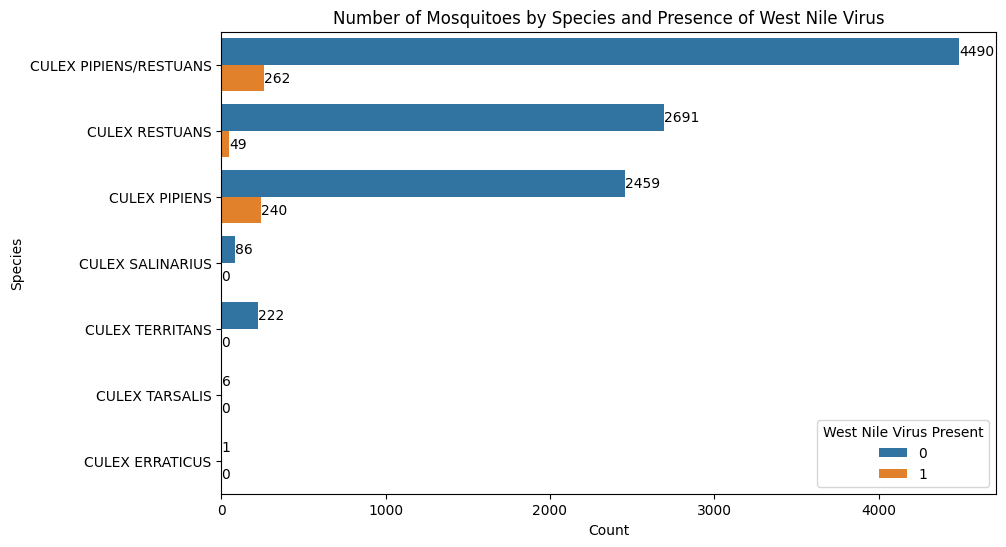

In [27]:

# Explore the Species column
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data=train_data, y='Species', hue='WnvPresent')
plt.title('Number of Mosquitoes by Species and Presence of West Nile Virus')
plt.xlabel('Count')
plt.ylabel('Species')
plt.legend(title='West Nile Virus Present', loc='lower right')
add_counts_on_bars(ax1)
plt.show()



This shows that the culex pipens/restuans is the most prevalent disease, followed by the culex restuans, then the culex pipiens. It suggests that the other 3 species of the mosquitoes do not carry the virus and are also very rare to come by

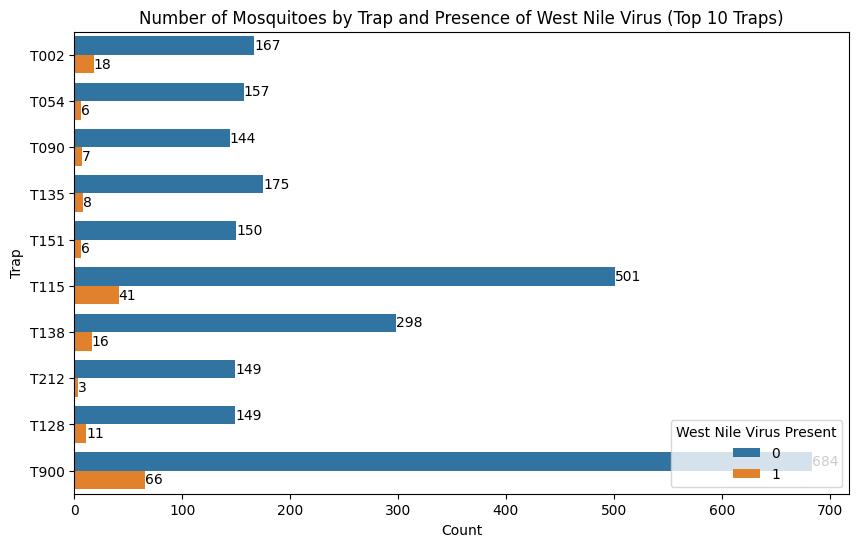

In [28]:
# Explore the Trap column (Top 10 traps with most mosquitoes)
top_traps = train_data['Trap'].value_counts().index[:10]
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(data=train_data[train_data['Trap'].isin(top_traps)], y='Trap', hue='WnvPresent')
plt.title('Number of Mosquitoes by Trap and Presence of West Nile Virus (Top 10 Traps)')
plt.xlabel('Count')
plt.ylabel('Trap')
plt.legend(title='West Nile Virus Present', loc='lower right')
add_counts_on_bars(ax2)
plt.show()

This diagram shows that the traps T900 and T115 are the most effective at catching mosquitoes in general, and also happen to have the highest RATIO of nile virus present in the traps when it catches them.

The traps of T002, T128, and T138 have pretty high ratios too

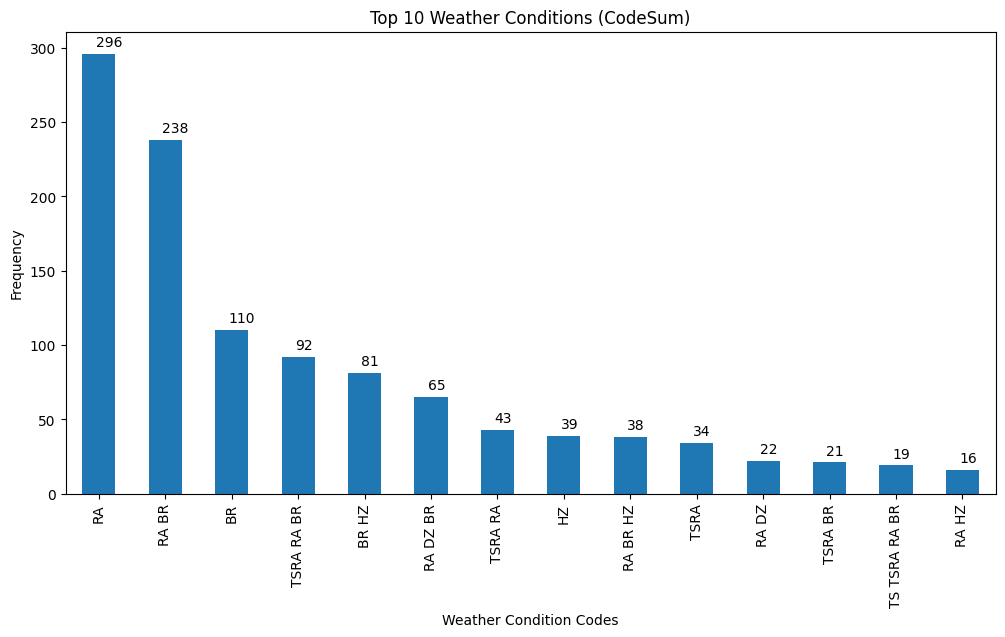

In [35]:
# Explore the CodeSum column in weather data
plt.figure(figsize=(12, 6))
ax3 = weather_data['CodeSum'].value_counts().iloc[1:15].plot(kind='bar')
plt.title('Top 10 Weather Conditions (CodeSum)')
plt.xlabel('Weather Condition Codes')
plt.ylabel('Frequency')

# Adding counts above the bars
for i in ax3.patches:
    ax3.text(i.get_x() + 0.2, i.get_height() + 5, str(i.get_height()), fontsize=10)

plt.show()


This breaks down the different weather codes and what their rates of occurrence are